# Results of network on test dataset

This notebok should show basic statistics of trained models, so we can compare them. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pathlib
%matplotlib inline

In [2]:
class_translation = {0:"clear",
                    1:"transparent",
                    2:"semi-transparent",
                    3:"opaque"}

## Preprocess data

In [3]:
input_path = pathlib.Path("./stats/")
training_accuracy = {}
validation_accuracy = {}
for folder in list(input_path.glob("*")):
    if (folder/"stats_absolute_numbers.csv").exists():
        df = pd.read_csv(folder/"stats_absolute_numbers.csv", index_col=0)
        training_accuracy[folder.name]={}
        for class_id, class_name in enumerate(df.columns):
            training_accuracy[folder.name][class_translation[class_id]] = {}
            class_df = df[class_name]
            training_accuracy[folder.name][class_translation[class_id]]["accuracy"]= (class_df["tp"]+class_df["tn"])/class_df["total"]
            training_accuracy[folder.name][class_translation[class_id]]["precision"]= class_df["tp"] /(class_df["tp"]+class_df["fp"])
            training_accuracy[folder.name][class_translation[class_id]]["recall"]= class_df["tp"] /(class_df["tp"]+class_df["fn"])

## Plot accuracies

In [4]:
data = {}
for key, value in zip(training_accuracy.keys(), training_accuracy.values()):
    model_dict = training_accuracy[key]
    data[key] = {}
    for class_id, metrics in zip(model_dict.keys(), model_dict.values()):
        data[key][class_id] = metrics["accuracy"]
data_df = pd.DataFrame.from_dict(data)

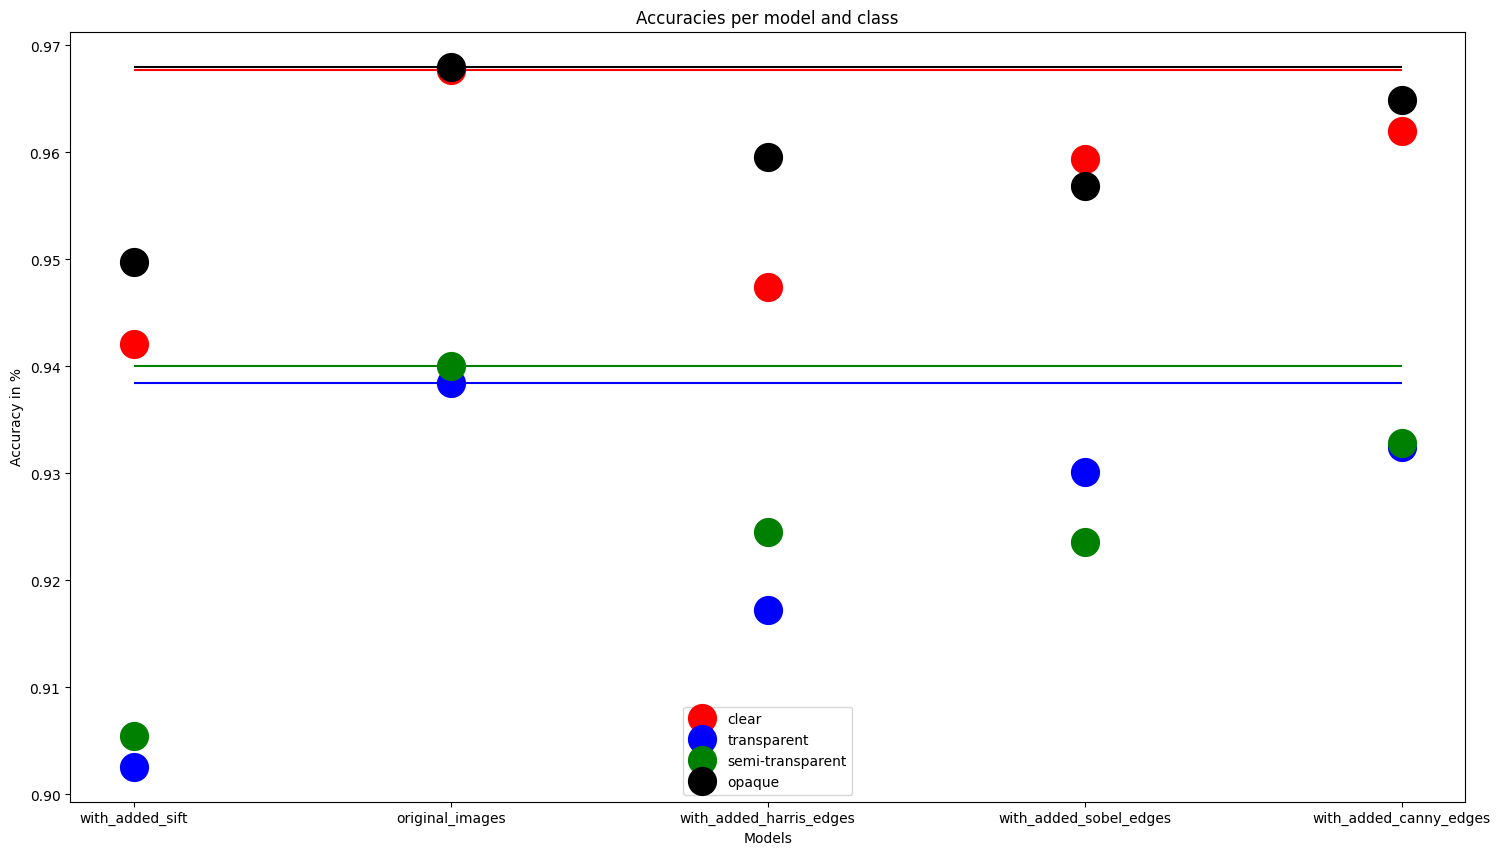

In [5]:
colors = ["red", "blue", "green", "black"]
plt.figure(figsize = (18,10))
for class_id, color in zip(data_df.index, colors):
    plt.plot(data_df.loc[class_id], "o",c = color, label = class_id, markersize=20)
    plt.hlines(data_df.loc[class_id].max(), xmin=0, xmax = len(data_df.loc[class_id])-1,colors = color)
plt.legend(loc="lower center")
plt.xlabel("Models")
plt.ylabel("Accuracy in %")
plt.title("Accuracies per model and class")
plt.show()

## Plot precisions

In [6]:
data = {}
for key, value in zip(training_accuracy.keys(), training_accuracy.values()):
    model_dict = training_accuracy[key]
    data[key] = {}
    for class_id, metrics in zip(model_dict.keys(), model_dict.values()):
        data[key][class_id] = metrics["precision"]
data_df = pd.DataFrame.from_dict(data)

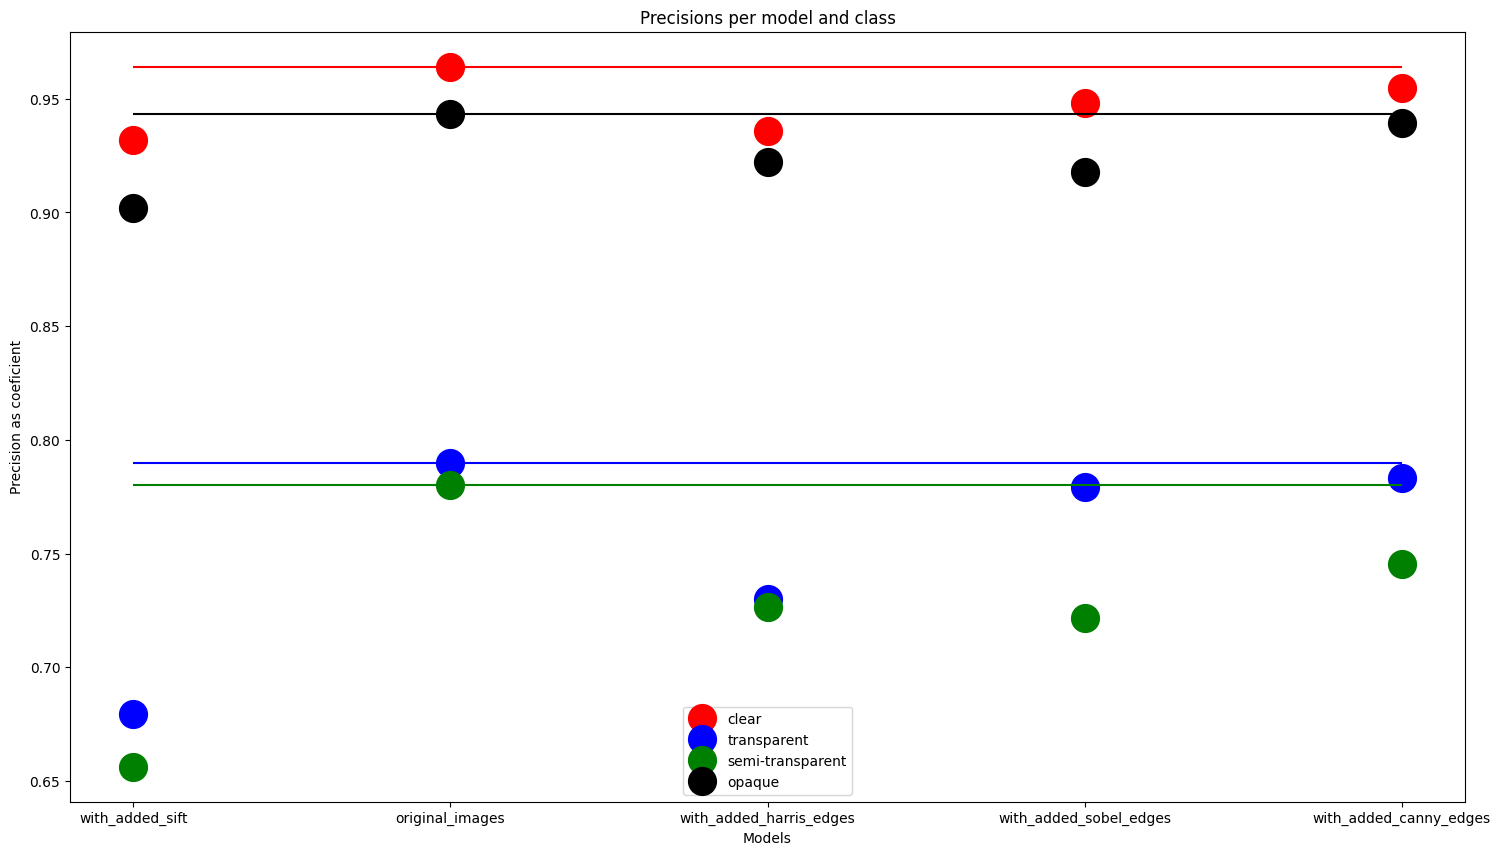

In [7]:
colors = ["red", "blue", "green", "black"]
plt.figure(figsize = (18,10))
for class_id, color in zip(data_df.index, colors):
    plt.plot(data_df.loc[class_id], "o",c = color, label = class_id, markersize=20)
    plt.hlines(data_df.loc[class_id].max(), xmin=0, xmax = len(data_df.loc[class_id])-1,colors = color)
plt.legend(loc="lower center")
plt.xlabel("Models")
plt.ylabel("Precision as coeficient")
plt.title("Precisions per model and class")
plt.show()

## plot recalls

In [8]:
data = {}
for key, value in zip(training_accuracy.keys(), training_accuracy.values()):
    model_dict = training_accuracy[key]
    data[key] = {}
    for class_id, metrics in zip(model_dict.keys(), model_dict.values()):
        data[key][class_id] = metrics["recall"]
data_df = pd.DataFrame.from_dict(data)

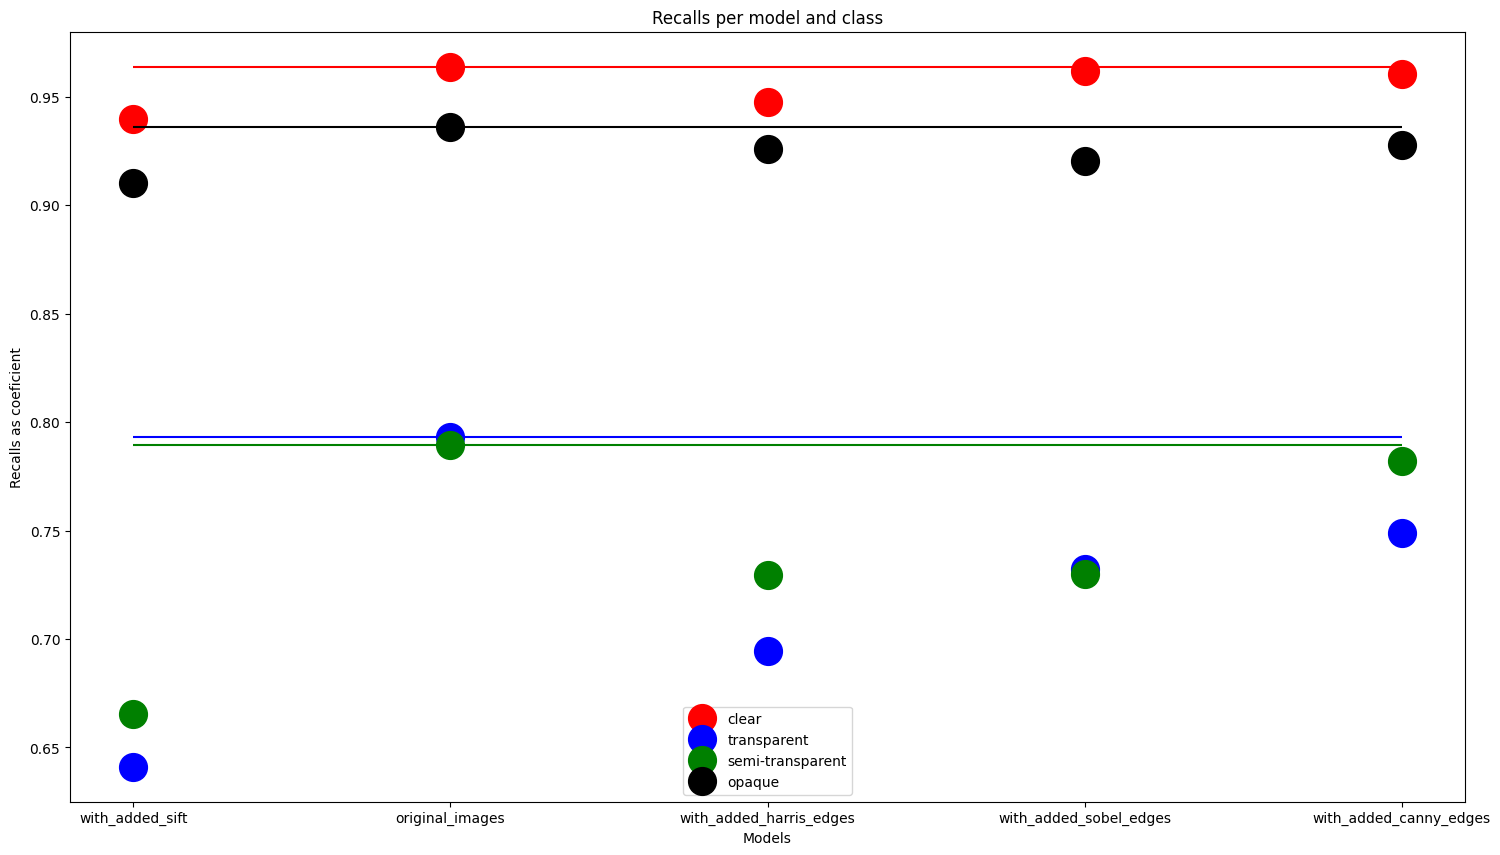

In [9]:
colors = ["red", "blue", "green", "black"]
plt.figure(figsize = (18,10))
for class_id, color in zip(data_df.index, colors):
    plt.plot(data_df.loc[class_id], "o",c = color, label = class_id, markersize=20)
    plt.hlines(data_df.loc[class_id].max(), xmin=0, xmax = len(data_df.loc[class_id])-1,colors = color)
plt.legend(loc="lower center")
plt.xlabel("Models")
plt.ylabel("Recalls as coeficient")
plt.title("Recalls per model and class")
plt.show()